# Q - learning method for $\epsilon$ greedy policies

In [6]:
from classes import Environment
from Q_learning import PlayerQL
from matplotlib import pyplot as plt

## Experiment with different $\epsilon$  and constant step size ($\alpha$) values

In [7]:


player = PlayerQL(epsilon = .2, alpha = .1)
env = Environment(player)
env.train(30000)
result = env.test(num_epochs = 20000)
print('eps = %s, step-size = %s, test result (win average): %s' 
          % (env.player.epsilon, env.player.alpha, result))

## Check agent's current strategy

## Test performance for constant step-size methods

eps = 0.2, step-size = 0.1, test result (win average): 0.4206


## Time-based decaying step-size methods

In [ ]:
parameters = [0.01, 0.1, 0.2]
steps = [0.3, 0.6, 0.8] # step size values
environments = []

for eps in parameters:
    for alpha in steps:
        scheduler = Environment.scheduler('time_based', initial_step_size = alpha, decay = 0.0001)
        player = PlayerQL(epsilon = eps, step_size = alpha)
        env = Environment(player)
        environments.append(env)

In [39]:
for env in environments:
    env.train(30000, 500)

In [14]:
history = []

for env in environments:
    epochs, win_avg = env.history
    history.append((epochs, win_avg))

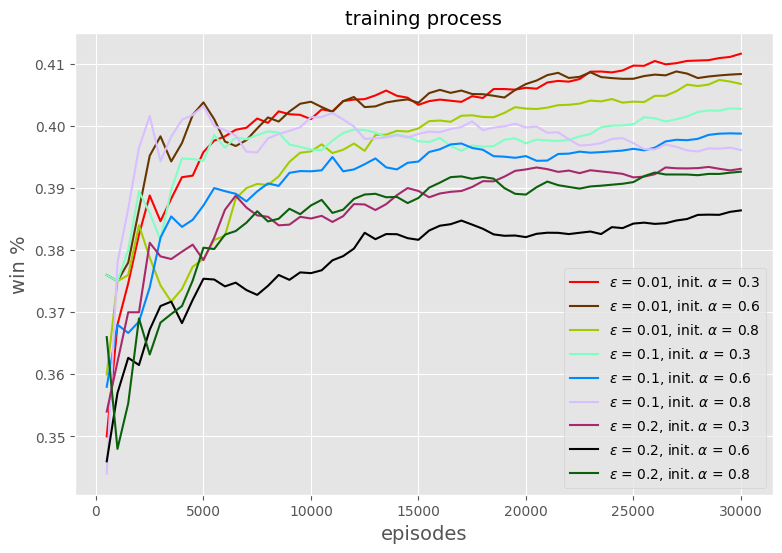

In [15]:
from cycler import cycler
plt.figure(figsize=(9,6))
plt.style.use("ggplot")
palette = ['#ff0000', '#663600', '#a3cc00', '#80ffc3', '#0088ff', '#d9bfff', '#a6296c', '#000000', 
               '#0B610B', '#8c4646', '#ff8800', '#5e664d', '#269991', '#1d3f73', '#7e468c', '#d96236', '#7f2200']
plt.rc('axes', prop_cycle = (cycler('color', palette)))
for i in range(0, len(history)):
    lab = r'$\epsilon$ = {}, init. $\alpha$ = {}'.format(environments[i].player.epsilon, environments[i].player.initial_step_size)
    plt.plot(history[i][0], history[i][1], label=lab)
plt.ylabel('win %', fontsize=14)
plt.xlabel('episodes', fontsize=14)
plt.title('training process', fontsize=14)
plt.legend(loc="best")
plt.show();

## Test performance for time-based decaying step-size methods

In [16]:
for env in environments:
    result = env.test(epochs = 20000)
    print('eps = %s, initial step-size = %s, test result (win average): %s' 
          % (env.player.epsilon, env.player.initial_step_size, result))

eps = 0.01, initial step-size = 0.3, test result (win average): 0.4184
eps = 0.01, initial step-size = 0.6, test result (win average): 0.4161
eps = 0.01, initial step-size = 0.8, test result (win average): 0.42505
eps = 0.1, initial step-size = 0.3, test result (win average): 0.42525
eps = 0.1, initial step-size = 0.6, test result (win average): 0.423
eps = 0.1, initial step-size = 0.8, test result (win average): 0.416
eps = 0.2, initial step-size = 0.3, test result (win average): 0.4254
eps = 0.2, initial step-size = 0.6, test result (win average): 0.41755
eps = 0.2, initial step-size = 0.8, test result (win average): 0.42485


## Step-size throughout training

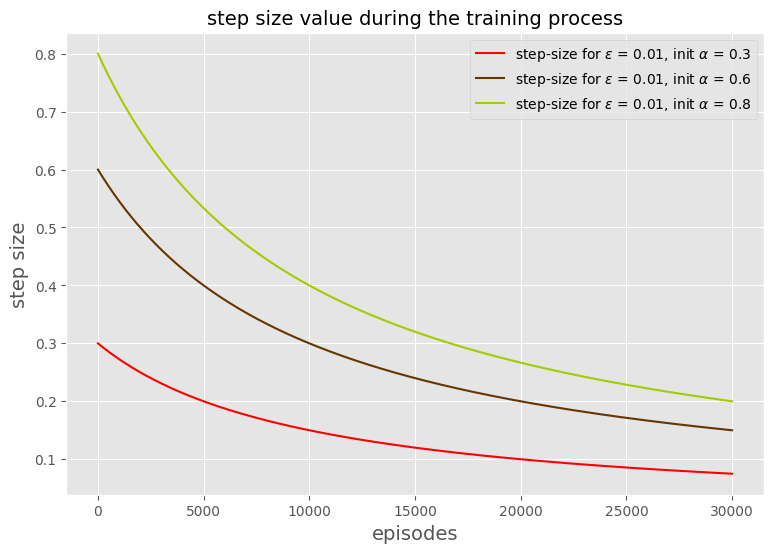

In [17]:
plt.figure(figsize=(9,6))
plt.style.use("ggplot")
palette = ['#ff0000', '#663600', '#a3cc00', '#80ffc3', '#0088ff', '#d9bfff', '#a6296c', '#000000', 
           '#0B610B', '#8c4646', '#ff8800', '#5e664d', '#269991', '#1d3f73', '#7e468c', '#d96236', '#7f2200']
plt.rc('axes', prop_cycle = (cycler('color', palette)))
training_episodes = list(range(1, len(environments[0].player.step_size_history)+1))
for i in range(0, 3):
    lab = 'step-size for ' + r'$\epsilon$ = {}, init $\alpha$ = {}'.format(environments[i].player.epsilon,environments[i].player.initial_step_size)
    plt.plot(training_episodes, environments[i].player.step_size_history, label = lab)
plt.ylabel('step size', fontsize=14)
plt.xlabel('episodes', fontsize=14)
plt.title('step size value during the training process', fontsize=14)
plt.legend(loc="best")
plt.show();

## Step-decay decaying step-size methods

In [18]:
parameters = [0.01, 0.1, 0.2]
steps = [0.3, 0.6, 0.8]
environments = []

for eps in parameters:
    for alpha in steps:
        scheduler = Environment.scheduler('step_decay', initial_step_size = alpha, 
                drop = 0.5, epochs_drop = 5000)
        player = PlayerQL(scheduler, epsilon = eps, step_size = alpha)
        env = Environment(player)
        environments.append(env)

In [19]:
for env in environments:
    env.train(30000, 500)

In [20]:
history = []

for env in environments:
    epochs, win_avg = env.history
    history.append((epochs, win_avg))

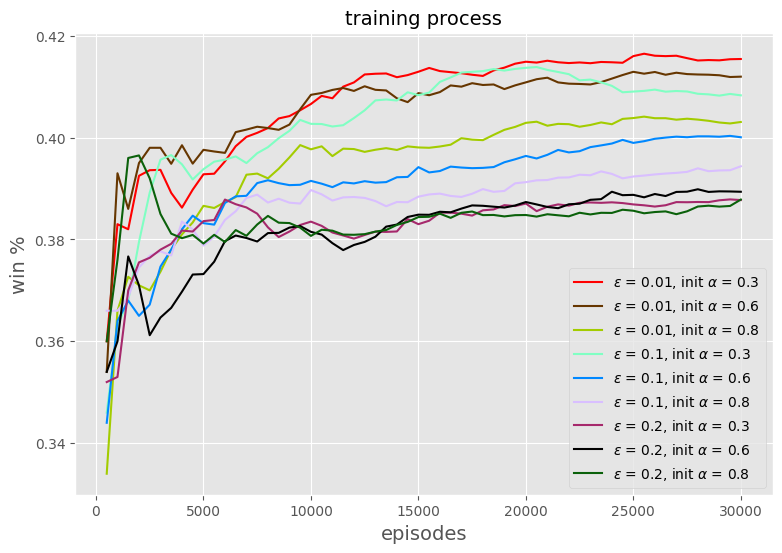

In [21]:
from cycler import cycler
plt.figure(figsize=(9,6))
plt.style.use("ggplot")
palette = ['#ff0000', '#663600', '#a3cc00', '#80ffc3', '#0088ff', '#d9bfff', '#a6296c', '#000000', 
           '#0B610B', '#8c4646', '#ff8800', '#5e664d', '#269991', '#1d3f73', '#7e468c', '#d96236', '#7f2200']
plt.rc('axes', prop_cycle = (cycler('color', palette)))
for i in range(0, len(history)):
    lab = r'$\epsilon$ = {}, init $\alpha$ = {}'.format(environments[i].player.epsilon,environments[i].player.initial_step_size)
    plt.plot(history[i][0], history[i][1], label=lab)
plt.ylabel('win %', fontsize=14)
plt.xlabel('episodes', fontsize=14)
plt.title('training process', fontsize=14)
plt.legend(loc="best")
plt.show();

## Test performance for step-decay decaying step-size methods

In [22]:
for env in environments:
    result = env.test(epochs = 20000)
    print('eps = %s, initial step-size = %s, test result (win average): %s' 
          % (env.player.epsilon, env.player.initial_step_size, result))

eps = 0.01, initial step-size = 0.3, test result (win average): 0.42015
eps = 0.01, initial step-size = 0.6, test result (win average): 0.4163
eps = 0.01, initial step-size = 0.8, test result (win average): 0.41305
eps = 0.1, initial step-size = 0.3, test result (win average): 0.42325
eps = 0.1, initial step-size = 0.6, test result (win average): 0.42195
eps = 0.1, initial step-size = 0.8, test result (win average): 0.4186
eps = 0.2, initial step-size = 0.3, test result (win average): 0.42465
eps = 0.2, initial step-size = 0.6, test result (win average): 0.4196
eps = 0.2, initial step-size = 0.8, test result (win average): 0.4218


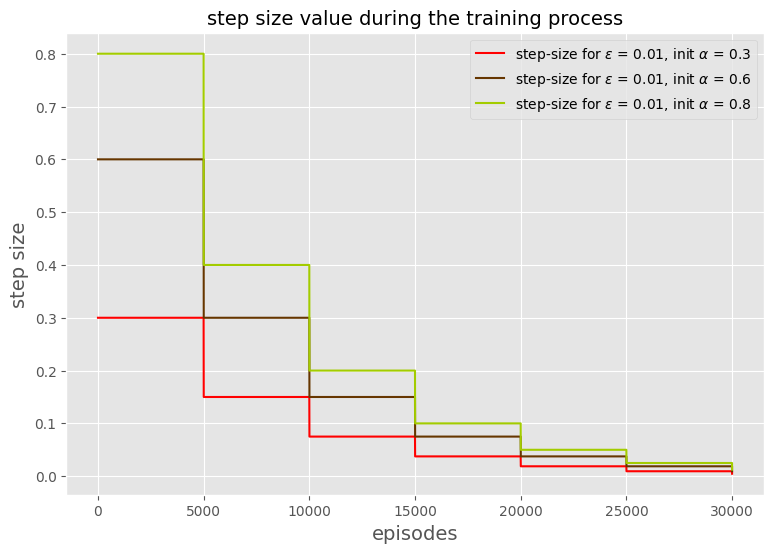

In [23]:
plt.figure(figsize=(9,6))
plt.style.use("ggplot")
palette = ['#ff0000', '#663600', '#a3cc00', '#80ffc3', '#0088ff', '#d9bfff', '#a6296c', '#000000', 
           '#0B610B', '#8c4646', '#ff8800', '#5e664d', '#269991', '#1d3f73', '#7e468c', '#d96236', '#7f2200']
plt.rc('axes', prop_cycle = (cycler('color', palette)))
training_episodes = list(range(1, len(environments[0].player.step_size_history)+1))
for i in range(0, 3):
    lab = 'step-size for ' + r'$\epsilon$ = {}, init $\alpha$ = {}'.format(environments[i].player.epsilon,environments[i].player.initial_step_size)
    plt.plot(training_episodes, environments[i].player.step_size_history, label = lab)
plt.ylabel('step size', fontsize=14)
plt.xlabel('episodes', fontsize=14)
plt.title('step size value during the training process', fontsize=14)
plt.legend(loc="best")
plt.show();

## Exponentially decaying step-size methods

In [24]:
parameters = [0.01, 0.1, 0.2]
steps = [0.5, 0.8, 1]
environments = []

for eps in parameters:
    for alpha in steps:
        # scheduler = Environment.scheduler('exponential_decay', initial_step_size = alpha, 
        #         decay_rate = 0.5, decay = 0.0002)
        player = PlayerQL(epsilon = eps, step_size = alpha)
        env = Environment(player)
        environments.append(env)

In [25]:
for env in environments:
    env.train(30000, 500)

In [26]:
history = []

for env in environments:
    epochs, win_avg = env.history
    history.append((epochs, win_avg))

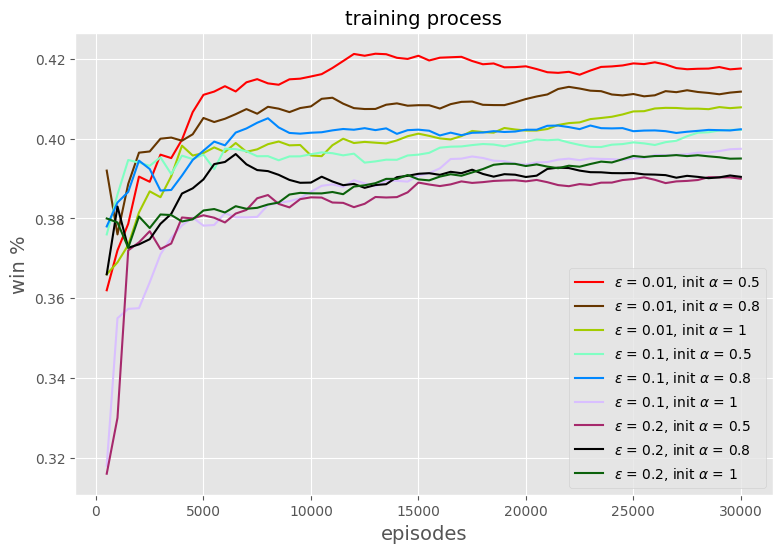

In [27]:
from cycler import cycler
plt.figure(figsize=(9,6))
plt.style.use("ggplot")
palette = ['#ff0000', '#663600', '#a3cc00', '#80ffc3', '#0088ff', '#d9bfff', '#a6296c', '#000000', 
           '#0B610B', '#8c4646', '#ff8800', '#5e664d', '#269991', '#1d3f73', '#7e468c', '#d96236', '#7f2200']
plt.rc('axes', prop_cycle = (cycler('color', palette)))
for i in range(0, len(history)):
    lab = r'$\epsilon$ = {}, init $\alpha$ = {}'.format(environments[i].player.epsilon,environments[i].player.initial_step_size)
    plt.plot(history[i][0], history[i][1], label=lab)
plt.ylabel('win %', fontsize=14)
plt.xlabel('episodes', fontsize=14)
plt.title('training process', fontsize=14)
plt.legend(loc="best")
plt.show();

## Test performance for exponentially decaying step-size methods

In [28]:
for env in environments:
    result = env.test(epochs = 20000)
    print('eps = %s, initial step-size = %s, test result (win average): %s' 
          % (env.player.epsilon, env.player.initial_step_size, result))

eps = 0.01, initial step-size = 0.5, test result (win average): 0.4237
eps = 0.01, initial step-size = 0.8, test result (win average): 0.4139
eps = 0.01, initial step-size = 1, test result (win average): 0.4184
eps = 0.1, initial step-size = 0.5, test result (win average): 0.4152
eps = 0.1, initial step-size = 0.8, test result (win average): 0.41915
eps = 0.1, initial step-size = 1, test result (win average): 0.41635
eps = 0.2, initial step-size = 0.5, test result (win average): 0.41725
eps = 0.2, initial step-size = 0.8, test result (win average): 0.42695
eps = 0.2, initial step-size = 1, test result (win average): 0.4224


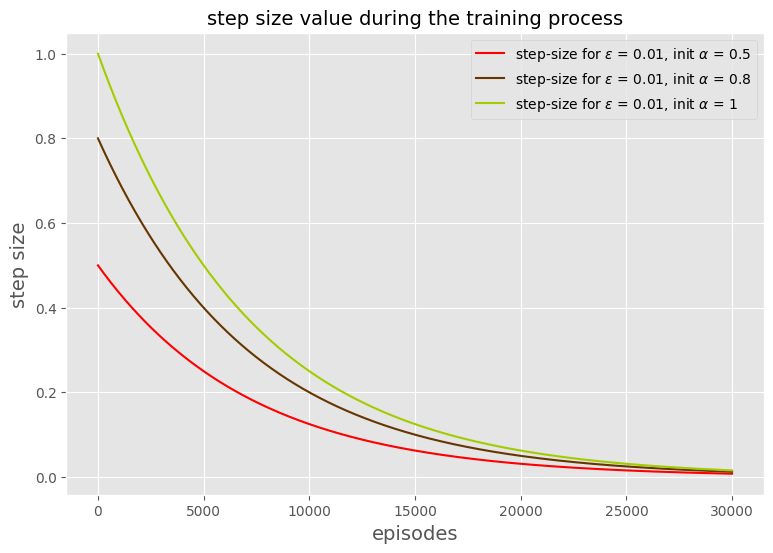

In [29]:
plt.figure(figsize=(9,6))
plt.style.use("ggplot")
palette = ['#ff0000', '#663600', '#a3cc00', '#80ffc3', '#0088ff', '#d9bfff', '#a6296c', '#000000', 
           '#0B610B', '#8c4646', '#ff8800', '#5e664d', '#269991', '#1d3f73', '#7e468c', '#d96236', '#7f2200']
plt.rc('axes', prop_cycle = (cycler('color', palette)))
training_episodes = list(range(1, len(environments[0].player.step_size_history)+1))
for i in range(0, 3):
    lab = r'step-size for $\epsilon$ = {}, init $\alpha$ = {}'.format(environments[i].player.epsilon,environments[i].player.initial_step_size)
    plt.plot(training_episodes, environments[i].player.step_size_history, label = lab)
plt.ylabel('step size', fontsize=14)
plt.xlabel('episodes', fontsize=14)
plt.title('step size value during the training process', fontsize=14)
plt.legend(loc="best")
plt.show();